In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- Select the columns that we require from LL84, MapPluto, and ResStock
- Compare the electricity itnensity values with ResStock and output % higher or lower column. Map this in Tableau showing higher and lower values
- Assign all buildings in MapPluto to ResStock modeling
- Visualize in Tableau (NYC Building Stock)

### ResStock + Pluto with PUMA

In [2]:
df=pd.read_csv("combined.csv")
df.head()

,field_1,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postcode,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,National Median Reference Property Type,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,National Median ENERGY STAR Score,Target ENERGY STAR Score,Reason(s) for No Score,ENERGY STAR Certification - Year(s) Certified (Score),ENERGY STAR Certification - Eligibility,ENERGY STAR Certification - Last Approval Date,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),Site Energy Use (kBtu),Weather Normalized Site Energy Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),Source Energy Use (kBtu),Weather Normalized Source Energy Use (kBtu),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Natural Gas Use (therms),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kWh),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kBtu),Electricity Use – Generated from Onsite Renewable Systems (kWh),Electricity Use – Generated from Onsite Renewable Systems and Exported (kWh),Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Annual Maximum Demand (Meter Name (Meter ID)),Green Power - Onsite (kWh),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/ft²),Direct GHG Emissions Intensity (kgCO2e/ft²),Indirect GHG Emissions (Metric Tons CO2e),Net Emissions (Metric Tons CO2e),Indirect GHG Emissions Intensity (kgCO2e/ft²),National Median Total GHG Emissions (Metric Tons CO2e),eGRID Output Emissions Rate (kgCO2e/MBtu),Avoided Emissions - Onsite Green Power (Metric Tons CO2e),Avoided Emissions - Offsite Green Power (Metric Tons CO2e),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Percent of Electricity that is Green Power,Percent of RECs Retained,Percent of Total Electricity Generated from Onsite Renewable Systems,LEED US Project ID,Adult Education - Gross Floor Area (ft²),Ambulatory Surgical Center - Gross Floor Area (ft²),Automobile Dealership - Gross Floor Area (ft²),Bank Branch - Gross Floor Area (ft²),Barracks- Gross Floor Area (ft²),College/University - Gross Floor Area (ft²),Convention Center - Gross Floor Area (ft²),Courthouse - Gross Floor Area (ft²),Data Center - Gross Floor Area (ft²),Data Center - UPS System Redundancy,Data Center - Cooling Equipment Redundancy,Data Center - IT Energy Configuration,Data Center - Energy Estimates Applied,Data Center - UPS Output Meter (kWh),Data Center - PDU Input Meter (kWh),Data Center - PDU Output Meter (kWh),Data Center - IT Equipment Input Meter (kWh),Data Center - IT Site Energy (kWh),Data Center - IT Source Energy (kBtu),Data Center - PU

In [3]:
df.shape

(17671, 354)

In [4]:
#data cleaning

# Get the number of unique values in each column
unique_counts = df.nunique()

# Get the columns with only one unique value
cols_to_drop = unique_counts[unique_counts == 1].index

# Drop the columns
df = df.drop(cols_to_drop, axis=1)

df.shape

(17671, 310)

In [5]:
# Calculate the percentage of zeros in each column
zero_percent = df.isin([0,"None"]).mean()

# Drop columns with more than 95% zeros
df = df.drop(df.columns[zero_percent > 0.95], axis=1)

df.shape

(17671, 305)

In [6]:
df.head()

,field_1,Property Id,Property Name,Parent Property Id,Parent Property Name,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postcode,Primary Property Type - Portfolio Manager-Calculated,National Median Reference Property Type,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Target ENERGY STAR Score,Reason(s) for No Score,ENERGY STAR Certification - Year(s) Certified (Score),ENERGY STAR Certification - Eligibility,ENERGY STAR Certification - Last Approval Date,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),Site Energy Use (kBtu),Weather Normalized Site Energy Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),Source Energy Use (kBtu),Weather Normalized Source Energy Use (kBtu),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Natural Gas Use (therms),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kWh),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kBtu),Electricity Use – Generated from Onsite Renewable Systems (kWh),Electricity Use – Generated from Onsite Renewable Systems and Exported (kWh),Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Annual Maximum Demand (Meter Name (Meter ID)),Green Power - Onsite (kWh),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/ft²),Direct GHG Emissions Intensity (kgCO2e/ft²),Indirect GHG Emissions (Metric Tons CO2e),Net Emissions (Metric Tons CO2e),Indirect GHG Emissions Intensity (kgCO2e/ft²),National Median Total GHG Emissions (Metric Tons CO2e),eGRID Output Emissions Rate (kgCO2e/MBtu),Avoided Emissions - Onsite Green Power (Metric Tons CO2e),Avoided Emissions - Offsite Green Power (Metric Tons CO2e),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Percent of Electricity that is Green Power,Percent of RECs Retained,Percent of Total Electricity Generated from Onsite Renewable Systems,LEED US Project ID,Adult Education - Gross Floor Area (ft²),Ambulatory Surgical Center - Gross Floor Area (ft²),Bank Branch - Gross Floor Area (ft²),College/University - Gross Floor Area (ft²),Data Center - Gross Floor Area (ft²),Data Center - IT Energy Configuration,Data Center - Energy Estimates Applied,Data Center - UPS Output Meter (kWh),Data Center - PDU Input Meter (kWh),Data Center - PDU Output Meter (kWh),Data Center - IT Equipment Input Meter (kWh),Data Center - IT Site Energy (kWh),Data Center - IT Source Energy (kBtu),Enclosed Mall - Gross Floor Area (ft²),Energy/Power Station - Gross Floor Area (ft²),Financial Office - Gross Floor Area (ft²),Financial Office - Number of Computers,Financial Office - Weekly Operating Hours,Financial Office - Number of Workers on Main Shift,Fitness Center/Health Club/Gym - Gross Floor Area (ft²),Food Sales - Gross Floor Area (ft²),Food Service - Gross Floor Area (ft²

In [7]:
df["unit.sqft"]=df["resarea"]/df["unitsres"]
df["unit.sqft"].head()

0    1377.428571
1    1377.428571
2    1143.136519
3    1885.641026
4     671.716981
Name: unit.sqft, dtype: float64

In [8]:
df.shape

(17671, 306)

#### MapPluto + LL84 (with PUMA)
- unit.sqft
- numfloors
- unitsres
- yearbuilt
- Primary Property Type - Portfolio Manager-Calculated
- GISJOIN
- Natural Gas Use (kBtu)
- out.site_energy.total.energy_consumption_intensity

#### ResStock columns
- in.sqft
- in.geometry_stories
- in.geometry_building_number_units_mf
- in.vintage_acs
- in.geometry_building_type_recs
- in.puma
- out.natural_gas.total.energy_consumption_intensity
- Weather Normalized Site Electricity Intensity (kWh/ft²)

In [9]:
cols_01=['NYC Borough, Block and Lot (BBL)','unit.sqft','numfloors','unitsres','yearbuilt','Primary Property Type - Portfolio Manager-Calculated','GISJOIN',
        'Natural Gas Use (kBtu)','Weather Normalized Site Electricity Intensity (kWh/ft²)','Latitude','Longitude']

cols_02=['bldg_id','in.sqft','in.geometry_stories','in.geometry_building_number_units_mf','in.vintage_acs','in.geometry_building_type_recs',
        'in.puma','out.natural_gas.total.energy_consumption_intensity','out.site_energy.total.energy_consumption_intensity']

In [10]:
df_match=df[cols_01]
#df_match.to_csv("pluto_84_match.csv")
df_match.head()

,"NYC Borough, Block and Lot (BBL)",unit.sqft,numfloors,unitsres,yearbuilt,Primary Property Type - Portfolio Manager-Calculated,GISJOIN,Natural Gas Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Latitude,Longitude
0,1000167517,1377.428571,33.0,245,2006,Multifamily Housing,G36003810,34263364.5,9,40.707060,-74.016519
1,1000167517,1377.428571,33.0,245,2006,Multifamily Housing,G36003810,34263364.5,9.2,40.707060,-74.016519
2,1000160180,1143.136519,27.0,293,2002,Multifamily Housing,G36003810,24339986.5,7.5,40.716942,-74.016298
3,1006030037,1885.641026,8.0,39,1920,Multifamily Housing,G36003810,1135843.2,7.3,40.731789,-74.007956
4,1005620040,671.716981,9.0,53,1900,Multifamily Housing,G36003810,113931.4,8.7,40.732319,-73.992812


In [11]:
df_match.to_csv("pluto_84_match.csv")

### ResStock

In [3]:
res = pd.read_csv("C:/Users/Shetty/OneDrive/Desktop/NYU/Independent Study/NREL/Archvie/Metadata_NY_170123.csv")
res.head()

,Unnamed: 0,bldg_id,applicability,in.sqft,weight,in.ahs_region,in.ashrae_iecc_climate_zone_2004,in.ashrae_iecc_climate_zone_2004_2_a_split,in.bathroom_spot_vent_hour,in.bedrooms,in.building_america_climate_zone,in.cec_climate_zone,in.ceiling_fan,in.census_division,in.census_division_recs,in.census_region,in.city,in.clothes_dryer,in.clothes_washer,in.clothes_washer_presence,in.cooking_range,in.cooling_setpoint,in.cooling_setpoint_has_offset,in.cooling_setpoint_offset_magnitude,in.cooling_setpoint_offset_period,in.corridor,in.county,in.county_and_puma,in.dehumidifier,in.dishwasher,in.door_area,in.doors,in.ducts,in.eaves,in.electric_vehicle,in.emissions_electricity_folders,in.emissions_electricity_units,in.emissions_electricity_values_or_filepaths,in.emissions_fossil_fuel_units,in.emissions_fuel_oil_values,in.emissions_natural_gas_values,in.emissions_propane_values,in.emissions_scenario_names,in.emissions_types,in.emissions_wood_values,in.federal_poverty_level,in.generation_and_emissions_assessment_region,in.geometry_attic_type,in.geometry_building_horizontal_location_mf,in.geometry_building_horizontal_location_sfa,in.geometry_building_level_mf,in.geometry_building_number_units_mf,in.geometry_building_number_units_sfa,in.geometry_building_type_acs,in.geometry_building_type_height,in.geometry_building_type_recs,in.geometry_floor_area,in.geometry_floor_area_bin,in.geometry_foundation_type,in.geometry_garage,in.geometry_stories,in.geometry_stories_low_rise,in.geometry_story_bin,in.geometry_wall_exterior_finish,in.geometry_wall_type,in.has_pv,in.heating_fuel,in.heating_setpoint,in.heating_setpoint_has_offset,in.heating_setpoint_offset_magnitude,in.heating_setpoint_offset_period,in.holiday_lighting,in.hot_water_distribution,in.hot_water_fixtures,in.hvac_cooling_efficiency,in.hvac_cooling_partial_space_conditioning,in.hvac_cooling_type,in.hvac_has_ducts,in.hvac_has_shared_system,in.hvac_has_zonal_electric_heating,in.hvac_heating_efficiency,in.hvac_heating_type,in.hvac_heating_type_and_fuel,in.hvac_secondary_heating_efficiency,in.hvac_secondary_heating_type_and_fuel,in.hvac_shared_efficiencies,in.hvac_system_is_faulted,in.hvac_system_single_speed_ac_airflow,in.hvac_system_single_speed_ac_charge,in.hvac_system_single_speed_ashp_airflow,in.hvac_system_single_speed_ashp_charge,in.income,in.income_recs_2015,in.income_recs_2020,in.infiltration,in.insulation_ceiling,in.insulation_floor,in.insulation_foundation_wall,in.insulation_rim_joist,in.insulation_roof,in.insulation_slab,in.insulation_wall,in.interior_shading,in.iso_rto_region,in.lighting,in.lighting_interior_use,in.lighting_other_use,in.location_region,in.mechanical_ventilation,in.misc_extra_refrigerator,in.misc_freezer,in.misc_gas_fireplace,in.misc_gas_grill,in.misc_gas_lighting,in.misc_hot_tub_spa,in.misc_pool,in.misc_pool_heater,in.misc_pool_pump,in.misc_well_pump,in.natural_ventilation,in.neighbors,in.occupants,in.orientation,in.overhangs,in.plug_load_diversity,in.plug_loads,in.puma,in.puma_metro_status,in.pv_orientation,in.pv_system_size,in.radiant_barrier,in.range_spot_vent_hour,in.reeds_balancing_area,in.refrigerator,in.roof_material,in.schedules,in.simulation_control_run_period_begin_day_of_month,in.simulation_control_run_period_begin_month,in.simulation_control_run_period_calendar_year,in.simulation_control_run_period_end_day_of_month,in.simulation_control_run_period_end_month,in.simulation_control_timestep,in.solar_hot_water,in.state,in.tenure,in.units_represented,in.usage_level,in.vacancy_status,in.vintage,in.vintage_acs,in.water_heater_efficiency,in.water_heater_fuel,in.water_heater_in_unit,in.weather_file_city,in.weather_file_latitude,in.weather_file_longitude,in.window_areas,in.windows,out.electricity.total.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.fuel_oil.total.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.natural_gas.total.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.propane.total.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.electricity.total.lrmer

In [4]:
res['in.plug_loads'].max()

'97%'

In [ ]:
res[]

In [4]:
res["in.geometry_wall_type"].value_counts()

Wood Frame     7567
Brick          4272
Steel Frame    2144
Concrete         82
Name: in.geometry_wall_type, dtype: int64

In [25]:
# Get the number of unique values in each column
unique_counts = res.nunique()

# Get the columns with only one unique value
cols_to_drop = unique_counts[unique_counts == 1].index

# Drop the columns
res = res.drop(cols_to_drop, axis=1)

res.shape

(14065, 179)

In [26]:
res['in.county_and_puma'] = res['in.county_and_puma'].str.split(',').str[1]
res['in.county_and_puma'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: in.county_and_puma, dtype: float64

In [27]:
# Calculate the percentage of zeros in each column
zero_percent = res.isin([0]).mean()

# Drop columns with more than 95% zeros
res = res.drop(res.columns[zero_percent > 0.95], axis=1)

res.shape

(14065, 157)

In [28]:
# Calculate the percentage of none in each column
none_percent = res.isin(['None']).mean()

# Drop columns with more than 95% zeros
res = res.drop(res.columns[none_percent > 0.95], axis=1)

res.shape

(14065, 147)

In [29]:
res.head()

,Unnamed: 0,bldg_id,in.sqft,in.bathroom_spot_vent_hour,in.bedrooms,in.ceiling_fan,in.clothes_dryer,in.clothes_washer,in.clothes_washer_presence,in.cooking_range,in.cooling_setpoint,in.cooling_setpoint_has_offset,in.cooling_setpoint_offset_magnitude,in.cooling_setpoint_offset_period,in.corridor,in.county,in.county_and_puma,in.dishwasher,in.ducts,in.federal_poverty_level,in.geometry_attic_type,in.geometry_building_horizontal_location_mf,in.geometry_building_horizontal_location_sfa,in.geometry_building_level_mf,in.geometry_building_number_units_mf,in.geometry_building_number_units_sfa,in.geometry_building_type_acs,in.geometry_building_type_height,in.geometry_building_type_recs,in.geometry_floor_area,in.geometry_floor_area_bin,in.geometry_foundation_type,in.geometry_stories,in.geometry_stories_low_rise,in.geometry_story_bin,in.geometry_wall_exterior_finish,in.geometry_wall_type,in.has_pv,in.heating_fuel,in.heating_setpoint,in.heating_setpoint_has_offset,in.heating_setpoint_offset_magnitude,in.heating_setpoint_offset_period,in.hot_water_fixtures,in.hvac_cooling_efficiency,in.hvac_cooling_partial_space_conditioning,in.hvac_cooling_type,in.hvac_has_ducts,in.hvac_has_shared_system,in.hvac_has_zonal_electric_heating,in.hvac_heating_efficiency,in.hvac_heating_type,in.hvac_heating_type_and_fuel,in.hvac_shared_efficiencies,in.income,in.income_recs_2015,in.income_recs_2020,in.infiltration,in.insulation_ceiling,in.insulation_floor,in.insulation_foundation_wall,in.insulation_rim_joist,in.insulation_roof,in.insulation_slab,in.insulation_wall,in.lighting,in.misc_extra_refrigerator,in.misc_freezer,in.misc_well_pump,in.neighbors,in.occupants,in.orientation,in.plug_load_diversity,in.plug_loads,in.puma,in.radiant_barrier,in.range_spot_vent_hour,in.refrigerator,in.roof_material,in.tenure,in.usage_level,in.vacancy_status,in.vintage,in.vintage_acs,in.water_heater_efficiency,in.water_heater_fuel,in.water_heater_in_unit,in.weather_file_city,in.weather_file_latitude,in.weather_file_longitude,in.window_areas,in.windows,out.electricity.total.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.natural_gas.total.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.electricity.total.lrmer_low_re_cost_15_2025_start.co2e_kg,out.natural_gas.total.lrmer_low_re_cost_15_2025_start.co2e_kg,out.electricity.total.lrmer_low_re_cost_25_2025_start.co2e_kg,out.natural_gas.total.lrmer_low_re_cost_25_2025_start.co2e_kg,out.electricity.total.lrmer_mid_case_15_2025_start.co2e_kg,out.natural_gas.total.lrmer_mid_case_15_2025_start.co2e_kg,out.electricity.ceiling_fan.energy_consumption,out.electricity.ceiling_fan.energy_consumption_intensity,out.electricity.clothes_dryer.energy_consumption,out.electricity.clothes_dryer.energy_consumption_intensity,out.electricity.clothes_washer.energy_consumption,out.electricity.clothes_washer.energy_consumption_intensity,out.electricity.cooling_fans_pumps.energy_consumption,out.electricity.cooling_fans_pumps.energy_consumption_intensity,out.electricity.cooling.energy_consumption,out.electricity.cooling.energy_consumption_intensity,out.electricity.dishwasher.energy_consumption,out.electricity.dishwasher.energy_consumption_intensity,out.electricity.freezer.energy_consumption,out.electricity.freezer.energy_consumption_intensity,out.electricity.heating_fans_pumps.energy_consumption,out.electricity.heating_fans_pumps.energy_consumption_intensity,out.electricity.heating_hp_bkup.energy_consumption,out.electricity.heating_hp_bkup.energy_consumption_intensity,out.electricity.heating.energy_consumption,out.electricity.heating.energy_consumption_intensity,out.electricity.hot_water.energy_consumption,out.electricity.hot_water.energy_consumption_intensity,out.electricity.lighting_exterior.energy_consumption,out.electricity.lighting_exterior.energy_consumption_intensity,out.electricity.lighting_interior.energy_consumption,out.electricity.lighting_interior.energy_consumption_intensity,out.electricity.mech_vent.energy_consumption,out.electricity.mech_vent.energy_c

In [30]:
res = res.drop(columns=['Unnamed: 0'])

In [31]:
res.head()

,bldg_id,in.sqft,in.bathroom_spot_vent_hour,in.bedrooms,in.ceiling_fan,in.clothes_dryer,in.clothes_washer,in.clothes_washer_presence,in.cooking_range,in.cooling_setpoint,in.cooling_setpoint_has_offset,in.cooling_setpoint_offset_magnitude,in.cooling_setpoint_offset_period,in.corridor,in.county,in.county_and_puma,in.dishwasher,in.ducts,in.federal_poverty_level,in.geometry_attic_type,in.geometry_building_horizontal_location_mf,in.geometry_building_horizontal_location_sfa,in.geometry_building_level_mf,in.geometry_building_number_units_mf,in.geometry_building_number_units_sfa,in.geometry_building_type_acs,in.geometry_building_type_height,in.geometry_building_type_recs,in.geometry_floor_area,in.geometry_floor_area_bin,in.geometry_foundation_type,in.geometry_stories,in.geometry_stories_low_rise,in.geometry_story_bin,in.geometry_wall_exterior_finish,in.geometry_wall_type,in.has_pv,in.heating_fuel,in.heating_setpoint,in.heating_setpoint_has_offset,in.heating_setpoint_offset_magnitude,in.heating_setpoint_offset_period,in.hot_water_fixtures,in.hvac_cooling_efficiency,in.hvac_cooling_partial_space_conditioning,in.hvac_cooling_type,in.hvac_has_ducts,in.hvac_has_shared_system,in.hvac_has_zonal_electric_heating,in.hvac_heating_efficiency,in.hvac_heating_type,in.hvac_heating_type_and_fuel,in.hvac_shared_efficiencies,in.income,in.income_recs_2015,in.income_recs_2020,in.infiltration,in.insulation_ceiling,in.insulation_floor,in.insulation_foundation_wall,in.insulation_rim_joist,in.insulation_roof,in.insulation_slab,in.insulation_wall,in.lighting,in.misc_extra_refrigerator,in.misc_freezer,in.misc_well_pump,in.neighbors,in.occupants,in.orientation,in.plug_load_diversity,in.plug_loads,in.puma,in.radiant_barrier,in.range_spot_vent_hour,in.refrigerator,in.roof_material,in.tenure,in.usage_level,in.vacancy_status,in.vintage,in.vintage_acs,in.water_heater_efficiency,in.water_heater_fuel,in.water_heater_in_unit,in.weather_file_city,in.weather_file_latitude,in.weather_file_longitude,in.window_areas,in.windows,out.electricity.total.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.natural_gas.total.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.electricity.total.lrmer_low_re_cost_15_2025_start.co2e_kg,out.natural_gas.total.lrmer_low_re_cost_15_2025_start.co2e_kg,out.electricity.total.lrmer_low_re_cost_25_2025_start.co2e_kg,out.natural_gas.total.lrmer_low_re_cost_25_2025_start.co2e_kg,out.electricity.total.lrmer_mid_case_15_2025_start.co2e_kg,out.natural_gas.total.lrmer_mid_case_15_2025_start.co2e_kg,out.electricity.ceiling_fan.energy_consumption,out.electricity.ceiling_fan.energy_consumption_intensity,out.electricity.clothes_dryer.energy_consumption,out.electricity.clothes_dryer.energy_consumption_intensity,out.electricity.clothes_washer.energy_consumption,out.electricity.clothes_washer.energy_consumption_intensity,out.electricity.cooling_fans_pumps.energy_consumption,out.electricity.cooling_fans_pumps.energy_consumption_intensity,out.electricity.cooling.energy_consumption,out.electricity.cooling.energy_consumption_intensity,out.electricity.dishwasher.energy_consumption,out.electricity.dishwasher.energy_consumption_intensity,out.electricity.freezer.energy_consumption,out.electricity.freezer.energy_consumption_intensity,out.electricity.heating_fans_pumps.energy_consumption,out.electricity.heating_fans_pumps.energy_consumption_intensity,out.electricity.heating_hp_bkup.energy_consumption,out.electricity.heating_hp_bkup.energy_consumption_intensity,out.electricity.heating.energy_consumption,out.electricity.heating.energy_consumption_intensity,out.electricity.hot_water.energy_consumption,out.electricity.hot_water.energy_consumption_intensity,out.electricity.lighting_exterior.energy_consumption,out.electricity.lighting_exterior.energy_consumption_intensity,out.electricity.lighting_interior.energy_consumption,out.electricity.lighting_interior.energy_consumption_intensity,out.electricity.mech_vent.energy_consumption,out.electricity.mech_vent.energy_consumption_

In [6]:
res['in.federal_poverty_level'].value_counts()

400%+       6729
0-100%      2138
200-300%    1663
300-400%    1469
100-150%    1174
150-200%     892
Name: in.federal_poverty_level, dtype: int64

In [32]:
#res.to_csv("Metadata_NY.csv")

In [33]:
res_match=res[cols_02]
#res_match.to_csv("res_match.csv")
res_match.head()

,bldg_id,in.sqft,in.geometry_stories,in.geometry_building_number_units_mf,in.vintage_acs,in.geometry_building_type_recs,in.puma,out.natural_gas.total.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity
0,64,853,3,3,<1940,Multi-Family with 2 - 4 Units,G36004005,0.0,7.832865
1,69,617,2,12,<1940,Multi-Family with 5+ Units,G36004107,0.0,10.223288
2,76,853,3,3,1980-99,Multi-Family with 2 - 4 Units,G36004001,0.0,5.916737
3,132,2590,3,30,2010s,Multi-Family with 5+ Units,G36004109,0.0,2.500383
4,200,853,1,67,1960-79,Multi-Family with 5+ Units,G36004108,0.0,7.563158


In [35]:
res_match.to_csv("res_match.csv")

## Fine-tuning and matching

In [36]:
df_match.head()

,"NYC Borough, Block and Lot (BBL)",unit.sqft,numfloors,unitsres,yearbuilt,Primary Property Type - Portfolio Manager-Calculated,GISJOIN,Natural Gas Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Latitude,Longitude
0,1000167517,1377.428571,33.0,245,2006,Multifamily Housing,G36003810,34263364.5,9,40.707060,-74.016519
1,1000167517,1377.428571,33.0,245,2006,Multifamily Housing,G36003810,34263364.5,9.2,40.707060,-74.016519
2,1000160180,1143.136519,27.0,293,2002,Multifamily Housing,G36003810,24339986.5,7.5,40.716942,-74.016298
3,1006030037,1885.641026,8.0,39,1920,Multifamily Housing,G36003810,1135843.2,7.3,40.731789,-74.007956
4,1005620040,671.716981,9.0,53,1900,Multifamily Housing,G36003810,113931.4,8.7,40.732319,-73.992812


In [37]:
df_match["Primary Property Type - Portfolio Manager-Calculated"].value_counts()

Multifamily Housing    17659
Mixed Use Property         5
Other                      3
Not Available              1
Parking                    1
Office                     1
Medical Office             1
Name: Primary Property Type - Portfolio Manager-Calculated, dtype: int64

In [38]:
df_match=df_match[df_match["Primary Property Type - Portfolio Manager-Calculated"]=='Multifamily Housing']

In [39]:
df_match=df_match[df_match['unit.sqft']<=res_match['in.sqft'].max()]

In [40]:
df_match.shape

(17369, 11)

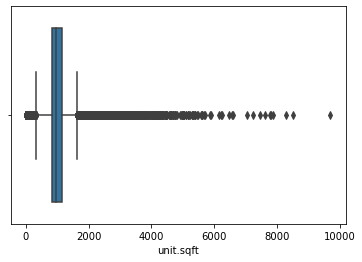

In [41]:
sns.boxplot(df_match['unit.sqft'])
plt.show()

In [42]:
res_match.head()

,bldg_id,in.sqft,in.geometry_stories,in.geometry_building_number_units_mf,in.vintage_acs,in.geometry_building_type_recs,in.puma,out.natural_gas.total.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity
0,64,853,3,3,<1940,Multi-Family with 2 - 4 Units,G36004005,0.0,7.832865
1,69,617,2,12,<1940,Multi-Family with 5+ Units,G36004107,0.0,10.223288
2,76,853,3,3,1980-99,Multi-Family with 2 - 4 Units,G36004001,0.0,5.916737
3,132,2590,3,30,2010s,Multi-Family with 5+ Units,G36004109,0.0,2.500383
4,200,853,1,67,1960-79,Multi-Family with 5+ Units,G36004108,0.0,7.563158


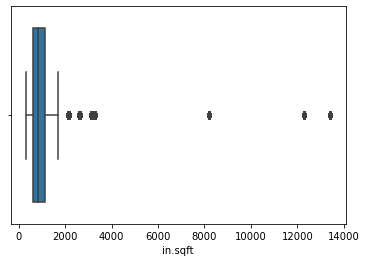

In [43]:
sns.boxplot(res_match['in.sqft'])
plt.show()

**1) unit sq.ft bins**

Create 10 quantile bins for column 'A'
res_match['in.sqft_bins'] = pd.qcut(res_match['in.sqft'], 10, duplicates='drop',)

#df_match['unit_bins'] = df_match.groupby(pd.qcut(res_match['in.sqft'], 10))['unit.sqft'].transform(lambda x: pd.qcut(x, 10, labels=list(range(1,11))))

In [44]:
#res_match['in.sqft_bins'].value_counts()

In [45]:
bin_edges = [333.0,617.0,853.0,1138.0,1220.0,2115.0,13414.0]
df_match['unit_bins'] = pd.cut(df_match['unit.sqft'], bins=bin_edges)
res_match['in.sqft_bins']= pd.cut(res_match['in.sqft'], bins=bin_edges)

In [46]:
df_match.head()

,"NYC Borough, Block and Lot (BBL)",unit.sqft,numfloors,unitsres,yearbuilt,Primary Property Type - Portfolio Manager-Calculated,GISJOIN,Natural Gas Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Latitude,Longitude,unit_bins
0,1000167517,1377.428571,33.0,245,2006,Multifamily Housing,G36003810,34263364.5,9,40.707060,-74.016519,"(1220.0, 2115.0]"
1,1000167517,1377.428571,33.0,245,2006,Multifamily Housing,G36003810,34263364.5,9.2,40.707060,-74.016519,"(1220.0, 2115.0]"
2,1000160180,1143.136519,27.0,293,2002,Multifamily Housing,G36003810,24339986.5,7.5,40.716942,-74.016298,"(1138.0, 1220.0]"
3,1006030037,1885.641026,8.0,39,1920,Multifamily Housing,G36003810,1135843.2,7.3,40.731789,-74.007956,"(1220.0, 2115.0]"
4,1005620040,671.716981,9.0,53,1900,Multifamily Housing,G36003810,113931.4,8.7,40.732319,-73.992812,"(617.0, 853.0]"


**Age of building**

In [47]:
res_match["in.vintage_acs"].value_counts()

<1940      5763
1940-59    3245
1960-79    2752
1980-99    1165
2000-09     770
2010s       370
Name: in.vintage_acs, dtype: int64

In [48]:
bin_edges = [0,1940,1960,1980,2000,2010,2023]
df_match['year_bins'] = pd.cut(df_match['yearbuilt'], bins=bin_edges, labels=['<1940','1940-59','1960-79','1980-99','2000-09','2010s'])
df_match.head()

,"NYC Borough, Block and Lot (BBL)",unit.sqft,numfloors,unitsres,yearbuilt,Primary Property Type - Portfolio Manager-Calculated,GISJOIN,Natural Gas Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Latitude,Longitude,unit_bins,year_bins
0,1000167517,1377.428571,33.0,245,2006,Multifamily Housing,G36003810,34263364.5,9,40.707060,-74.016519,"(1220.0, 2115.0]",2000-09
1,1000167517,1377.428571,33.0,245,2006,Multifamily Housing,G36003810,34263364.5,9.2,40.707060,-74.016519,"(1220.0, 2115.0]",2000-09
2,1000160180,1143.136519,27.0,293,2002,Multifamily Housing,G36003810,24339986.5,7.5,40.716942,-74.016298,"(1138.0, 1220.0]",2000-09
3,1006030037,1885.641026,8.0,39,1920,Multifamily Housing,G36003810,1135843.2,7.3,40.731789,-74.007956,"(1220.0, 2115.0]",<1940
4,1005620040,671.716981,9.0,53,1900,Multifamily Housing,G36003810,113931.4,8.7,40.732319,-73.992812,"(617.0, 853.0]",<1940


**Number of Units**

In [49]:
res_match.head()

,bldg_id,in.sqft,in.geometry_stories,in.geometry_building_number_units_mf,in.vintage_acs,in.geometry_building_type_recs,in.puma,out.natural_gas.total.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,in.sqft_bins
0,64,853,3,3,<1940,Multi-Family with 2 - 4 Units,G36004005,0.0,7.832865,"(617.0, 853.0]"
1,69,617,2,12,<1940,Multi-Family with 5+ Units,G36004107,0.0,10.223288,"(333.0, 617.0]"
2,76,853,3,3,1980-99,Multi-Family with 2 - 4 Units,G36004001,0.0,5.916737,"(617.0, 853.0]"
3,132,2590,3,30,2010s,Multi-Family with 5+ Units,G36004109,0.0,2.500383,"(2115.0, 13414.0]"
4,200,853,1,67,1960-79,Multi-Family with 5+ Units,G36004108,0.0,7.563158,"(617.0, 853.0]"


In [50]:
res_match['in.geometry_building_number_units_mf'].max()

'None'

In [51]:
res_match=res_match[res_match['in.geometry_building_number_units_mf']!='None']
res_match=res_match[res_match['in.geometry_building_number_units_mf']!='<1940']

In [52]:
res_match['in.geometry_building_number_units_mf'].max()

'9'

In [53]:
res_match['in.geometry_building_number_units_mf']=res_match['in.geometry_building_number_units_mf'].astype(int)

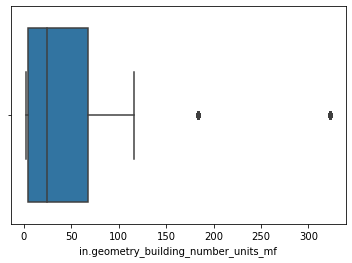

In [54]:
sns.boxplot(res_match['in.geometry_building_number_units_mf'])
plt.show()

In [55]:
res_match['in.geometry_building_number_units_mf'].max()

323

In [56]:
res_match['no.units_bins'] = pd.qcut(res_match['in.geometry_building_number_units_mf'], 10, duplicates='drop')
res_match['no.units_bins'].value_counts()

(1.999, 3.0]      2366
(43.0, 67.0]      1958
(24.0, 43.0]      1342
(3.0, 6.0]        1287
(13.0, 24.0]      1218
(6.0, 13.0]       1068
(67.0, 116.0]     1020
(183.0, 323.0]     948
(116.0, 183.0]     548
Name: no.units_bins, dtype: int64

In [57]:
bin_edges = [1.999,3.0,6.0,13.0,24.0,43.0,67.0,116.0,183.0,323.0]
df_match['no.units_bins'] = pd.cut(df_match['unitsres'], bins=bin_edges)
df_match.head()

,"NYC Borough, Block and Lot (BBL)",unit.sqft,numfloors,unitsres,yearbuilt,Primary Property Type - Portfolio Manager-Calculated,GISJOIN,Natural Gas Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Latitude,Longitude,unit_bins,year_bins,no.units_bins
0,1000167517,1377.428571,33.0,245,2006,Multifamily Housing,G36003810,34263364.5,9,40.707060,-74.016519,"(1220.0, 2115.0]",2000-09,"(183.0, 323.0]"
1,1000167517,1377.428571,33.0,245,2006,Multifamily Housing,G36003810,34263364.5,9.2,40.707060,-74.016519,"(1220.0, 2115.0]",2000-09,"(183.0, 323.0]"
2,1000160180,1143.136519,27.0,293,2002,Multifamily Housing,G36003810,24339986.5,7.5,40.716942,-74.016298,"(1138.0, 1220.0]",2000-09,"(183.0, 323.0]"
3,1006030037,1885.641026,8.0,39,1920,Multifamily Housing,G36003810,1135843.2,7.3,40.731789,-74.007956,"(1220.0, 2115.0]",<1940,"(24.0, 43.0]"
4,1005620040,671.716981,9.0,53,1900,Multifamily Housing,G36003810,113931.4,8.7,40.732319,-73.992812,"(617.0, 853.0]",<1940,"(43.0, 67.0]"


**Floors**

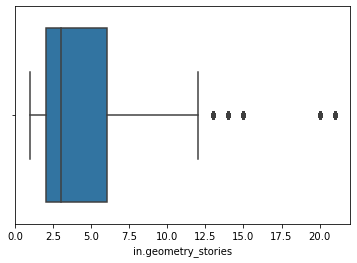

In [58]:
sns.boxplot(res_match['in.geometry_stories'])
plt.show()

In [59]:
res_match['floors_bins'] = pd.qcut(res_match['in.geometry_stories'], 10, duplicates='drop')
res_match['floors_bins'].value_counts()

(0.999, 2.0]    4365
(2.0, 3.0]      2332
(6.0, 14.0]     1171
(3.0, 4.0]      1146
(14.0, 21.0]    1110
(5.0, 6.0]       821
(4.0, 5.0]       810
Name: floors_bins, dtype: int64

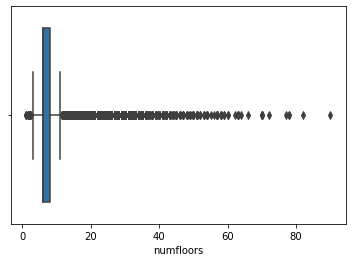

In [60]:
sns.boxplot(df_match['numfloors'])
plt.show()

In [61]:
bin_edges = [0.999,2.0,3.0,4.0,5.0,6.0,14.0,100.0]
df_match['floors_bins'] = pd.cut(df_match['numfloors'], bins=bin_edges)
df_match.head()

,"NYC Borough, Block and Lot (BBL)",unit.sqft,numfloors,unitsres,yearbuilt,Primary Property Type - Portfolio Manager-Calculated,GISJOIN,Natural Gas Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Latitude,Longitude,unit_bins,year_bins,no.units_bins,floors_bins
0,1000167517,1377.428571,33.0,245,2006,Multifamily Housing,G36003810,34263364.5,9,40.707060,-74.016519,"(1220.0, 2115.0]",2000-09,"(183.0, 323.0]","(14.0, 100.0]"
1,1000167517,1377.428571,33.0,245,2006,Multifamily Housing,G36003810,34263364.5,9.2,40.707060,-74.016519,"(1220.0, 2115.0]",2000-09,"(183.0, 323.0]","(14.0, 100.0]"
2,1000160180,1143.136519,27.0,293,2002,Multifamily Housing,G36003810,24339986.5,7.5,40.716942,-74.016298,"(1138.0, 1220.0]",2000-09,"(183.0, 323.0]","(14.0, 100.0]"
3,1006030037,1885.641026,8.0,39,1920,Multifamily Housing,G36003810,1135843.2,7.3,40.731789,-74.007956,"(1220.0, 2115.0]",<1940,"(24.0, 43.0]","(6.0, 14.0]"
4,1005620040,671.716981,9.0,53,1900,Multifamily Housing,G36003810,113931.4,8.7,40.732319,-73.992812,"(617.0, 853.0]",<1940,"(43.0, 67.0]","(6.0, 14.0]"


In [62]:
res_match.head()

,bldg_id,in.sqft,in.geometry_stories,in.geometry_building_number_units_mf,in.vintage_acs,in.geometry_building_type_recs,in.puma,out.natural_gas.total.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,in.sqft_bins,no.units_bins,floors_bins
0,64,853,3,3,<1940,Multi-Family with 2 - 4 Units,G36004005,0.0,7.832865,"(617.0, 853.0]","(1.999, 3.0]","(2.0, 3.0]"
1,69,617,2,12,<1940,Multi-Family with 5+ Units,G36004107,0.0,10.223288,"(333.0, 617.0]","(6.0, 13.0]","(0.999, 2.0]"
2,76,853,3,3,1980-99,Multi-Family with 2 - 4 Units,G36004001,0.0,5.916737,"(617.0, 853.0]","(1.999, 3.0]","(2.0, 3.0]"
3,132,2590,3,30,2010s,Multi-Family with 5+ Units,G36004109,0.0,2.500383,"(2115.0, 13414.0]","(24.0, 43.0]","(2.0, 3.0]"
4,200,853,1,67,1960-79,Multi-Family with 5+ Units,G36004108,0.0,7.563158,"(617.0, 853.0]","(43.0, 67.0]","(0.999, 2.0]"


**Renaming common columns**

In [63]:
res_match = res_match.rename(columns={'in.puma': 'Puma', 'in.vintage_acs': 'year_bins', 'in.sqft_bins': 'unit.sqft_bins'})
df_match = df_match.rename(columns={'GISJOIN': 'Puma', 'unit_bins': 'unit.sqft_bins'})

**Merging dataframes**

In [64]:
res_plu_ll = pd.merge(res_match, df_match, on=['Puma', 'year_bins', 'unit.sqft_bins', 'no.units_bins', 'floors_bins'])
res_plu_ll.head()

,bldg_id,in.sqft,in.geometry_stories,in.geometry_building_number_units_mf,year_bins,in.geometry_building_type_recs,Puma,out.natural_gas.total.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,unit.sqft_bins,no.units_bins,floors_bins,"NYC Borough, Block and Lot (BBL)",unit.sqft,numfloors,unitsres,yearbuilt,Primary Property Type - Portfolio Manager-Calculated,Natural Gas Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Latitude,Longitude
0,506,1138,9,116,1960-79,Multi-Family with 5+ Units,G36003707,0.0,4.494701,"(853.0, 1138.0]","(67.0, 116.0]","(6.0, 14.0]",2028120017,1005.382353,7.0,68,1963,Multifamily Housing,7907980.3,7.5,40.851598,-73.904265
1,506,1138,9,116,1960-79,Multi-Family with 5+ Units,G36003707,0.0,4.494701,"(853.0, 1138.0]","(67.0, 116.0]","(6.0, 14.0]",2031430001,1027.083333,10.0,84,1971,Multifamily Housing,20886285.2,8.7,40.852804,-73.898903
2,506,1138,9,116,1960-79,Multi-Family with 5+ Units,G36003707,0.0,4.494701,"(853.0, 1138.0]","(67.0, 116.0]","(6.0, 14.0]",2030240008,1072.072072,9.0,111,1972,Multifamily Housing,4779638.2,17.6,40.857975,-73.895519
3,202980,1138,12,116,1960-79,Multi-Family with 5+ Units,G36003707,0.0,3.432382,"(853.0, 1138.0]","(67.0, 116.0]","(6.0, 14.0]",2028120017,1005.382353,7.0,68,1963,Multifamily Housing,7907980.3,7.5,40.851598,-73.904265
4,202980,1138,12,116,1960-79,Multi-Family with 5+ Units,G36003707,0.0,3.432382,"(853.0, 1138.0]","(67.0, 116.0]","(6.0, 14.0]",2031430001,1027.083333,10.0,84,1971,Multifamily Housing,20886285.2,8.7,40.852804,-73.898903


In [65]:
res_plu_ll.shape

(7509, 22)

In [66]:
res_plu_ll=res_plu_ll[res_plu_ll['Weather Normalized Site Electricity Intensity (kWh/ft²)']!='Not Available']

In [67]:
res_plu_ll['Weather Normalized Site Electricity Intensity (kWh/ft²)']=res_plu_ll['Weather Normalized Site Electricity Intensity (kWh/ft²)'].astype(float)

In [68]:
res_plu_ll['diff_elec_intensity (kWh/ft²)'] = res_plu_ll['Weather Normalized Site Electricity Intensity (kWh/ft²)']-res_plu_ll['out.site_energy.total.energy_consumption_intensity']

In [69]:
res_plu_ll.shape

(7323, 23)

In [70]:
res_plu_ll['diff_elec_intensity (kWh/ft²)'] .min()

-18.46678378

In [71]:
res_plu_ll=res_plu_ll[res_plu_ll['diff_elec_intensity (kWh/ft²)']!=-np.inf]

In [72]:
res_plu_ll['diff_elec_intensity (kWh/ft²)'] .min()

-18.46678378

In [73]:
res_plu_ll['diff_elec_intensity (kWh/ft²)'] .max()

72.351964576

In [74]:
#bins = np.linspace(res_plu_ll['diff_elec_intensity (kWh/ft²)'] .min(), res_plu_ll['diff_elec_intensity (kWh/ft²)'] .max(), 10)
#res_plu_ll['Diff_bins'] = pd.cut(res_plu_ll['diff_elec_intensity (kWh/ft²)'], bins)
#res_plu_ll.head()

In [75]:
#res_plu_ll['Diff_bins'].value_counts()

In [76]:
res_plu_ll.to_csv("res_plu_ll.csv")

### MapPluto

In [22]:
pluto=pd.read_csv("C:/Users/Shetty/OneDrive/Desktop/NYU/Independent Study/NREL/MapPLUTO/pluto_22v3.csv")
pluto.head()

,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,healtharea,sanitboro,sanitdistrict,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,MN,574,65,102.0,1006300.0,1.006300e+10,63.0,2001.0,2.0,3.0,10011.0,E033,6.0,15.0,5700.0,1.0,2.0,3A,41 WEST 10 STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,C6,2.0,0.0,NaN,UNAVAILABLE OWNER,2321.0,6540.0,0.0,6540.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,5.0,5.0,24.5,94.75,25.0,80.00,E,3.0,N,5.0,1.0,567000.0,2223000.0,0.0,1839.0,1989.0,0.0,Greenwich Village Historic District,NaN,2.82,2.43,0.0,4.8,1,1.005740e+09,NaN,63.0,984990.0,206856.0,12c,NaN,103 019,10207.0,NaN,NaN,NaN,1,NaN,NaN,22v3,t,40.734448,-73.997330,NaN
1,BK,3435,45,304.0,3041100.0,3.041100e+10,411.0,1000.0,32.0,37.0,11207.0,Q252,83.0,34.0,3500.0,3.0,4.0,3B,177 COOPER STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,B2,1.0,0.0,NaN,"WASHINGTON, TIFFANIE L",2000.0,1800.0,0.0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,20.0,100.00,20.0,45.00,N,3.0,N,5.0,2.0,12300.0,74940.0,1460.0,1901.0,0.0,0.0,NaN,NaN,0.90,2.43,0.0,4.8,3,3.034350e+09,NaN,411.0,1010129.0,190246.0,17c,NaN,309 021,31109.0,NaN,NaN,NaN,1,NaN,NaN,22v3,NaN,40.688820,-73.906684,NaN
2,BK,3447,29,304.0,3041100.0,3.041100e+10,411.0,1002.0,32.0,37.0,11207.0,Q252,83.0,34.0,3500.0,3.0,4.0,3B,222 MOFFAT STREET,M1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,B1,1.0,0.0,NaN,JDC HOME INC.,2000.0,2200.0,0.0,2200.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,20.0,100.00,20.0,55.00,N,3.0,N,5.0,2.0,11940.0,75780.0,0.0,1910.0,0.0,0.0,NaN,NaN,1.10,0.00,1.0,2.4,3,3.034470e+09,NaN,411.0,1010530.0,190085.0,17c,NaN,309 021,31109.0,NaN,NaN,NaN,1,NaN,NaN,22v3,NaN,40.688377,-73.905239,NaN
3,BX,2514,10,204.0,2019300.0,2.019300e+10,193.0,4001.0,9.0,8.0,10452.0,E068,44.0,23.0,3310.0,2.0,4.0,2A,1082 OGDEN AVENUE,R7-1,NaN,NaN,NaN,C1-4,NaN,NaN,NaN,NaN,NaN,N,A1,1.0,0.0,NaN,"PINEDA, ARELIS",2875.0,1710.0,0.0,1710.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,1.0,25.0,115.00,19.0,42.67,N,1.0,N,5.0,2.0,14340.0,34560.0,0.0,1899.0,0.0,0.0,NaN,NaN,0.59,3.44,0.0,4.8,2,2.025140e+09,NaN,193.0,1004213.0,243491.0,3b,NaN,210S041,20908.0,NaN,NaN,NaN,1,NaN,NaN,22v3,NaN,40.834979,-73.927858,NaN
4,MN,482,7501,102.0,1004500.0,1.004500e+10,45.0,1006.0,2.0,1.0,10013.0,E055,5.0,15.0,6800.0,1.0,2.0,1A,406 BROOME STREET,C6-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,RB,5.0,0.0,NaN,LAFAYETTE COMMERCL CONDO,11750.0,74349.0,74349.0,0.0,9849.0,64500.0,0.0,0.0,0.0,0.0,2.0,1.0,7.0,0.0,25.0,149.5,100.42,0.0,0.00,NaN,0.0,Y,5.0,5.0,1143002.0,6811650.0,0.0,1900.0,0.0,0.0,SoHo-Cast Iron Historic District Extension,NaN,6.33,6.02,6.0,6.5,1,1.004828e+09,463.0,45.0,984876.0,202030.0,12c,NaN,101N073,10206.0,E-130,1.004821e+09,08/25/1988,1,NaN,NaN,22v3,NaN,40.721202,-73.997742,NaN


In [23]:
ll84 = pd.read_csv("C:/Users/Shetty/OneDrive/Desktop/NYU/Independent Study/NREL/LL84/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2021__Data_for_Calendar_Year_2020_.csv")
ll84.head()

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postcode,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,National Median Reference Property Type,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,National Median ENERGY STAR Score,Target ENERGY STAR Score,Reason(s) for No Score,ENERGY STAR Certification - Year(s) Certified (Score),ENERGY STAR Certification - Eligibility,ENERGY STAR Certification - Last Approval Date,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),Site Energy Use (kBtu),Weather Normalized Site Energy Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),Source Energy Use (kBtu),Weather Normalized Source Energy Use (kBtu),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Natural Gas Use (therms),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kWh),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kBtu),Electricity Use – Generated from Onsite Renewable Systems (kWh),Electricity Use – Generated from Onsite Renewable Systems and Exported (kWh),Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Annual Maximum Demand (Meter Name (Meter ID)),Green Power - Onsite (kWh),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/ft²),Direct GHG Emissions Intensity (kgCO2e/ft²),Indirect GHG Emissions (Metric Tons CO2e),Net Emissions (Metric Tons CO2e),Indirect GHG Emissions Intensity (kgCO2e/ft²),National Median Total GHG Emissions (Metric Tons CO2e),eGRID Output Emissions Rate (kgCO2e/MBtu),Avoided Emissions - Onsite Green Power (Metric Tons CO2e),Avoided Emissions - Offsite Green Power (Metric Tons CO2e),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Percent of Electricity that is Green Power,Percent of RECs Retained,Percent of Total Electricity Generated from Onsite Renewable Systems,LEED US Project ID,Adult Education - Gross Floor Area (ft²),Ambulatory Surgical Center - Gross Floor Area (ft²),Automobile Dealership - Gross Floor Area (ft²),Bank Branch - Gross Floor Area (ft²),Barracks- Gross Floor Area (ft²),College/University - Gross Floor Area (ft²),Convention Center - Gross Floor Area (ft²),Courthouse - Gross Floor Area (ft²),Data Center - Gross Floor Area (ft²),Data Center - UPS System Redundancy,Data Center - Cooling Equipment Redundancy,Data Center - IT Energy Configuration,Data Center - Energy Estimates Applied,Data Center - UPS Output Meter (kWh),Data Center - PDU Input Meter (kWh),Data Center - PDU Output Meter (kWh),Data Center - IT Equipment Input Meter (kWh),Data Center - IT Site Energy (kWh),Data Center - IT Source Energy (kBtu),Data Center - PUE,Data C

In [24]:
ll84=ll84[ll84["Primary Property Type - Self Selected"]=='Multifamily Housing']

- combine pluto and ll84
- import combined file into qgis and assign puma
- match buildings in both databases

In [26]:
ll84['NYC Borough, Block and Lot (BBL)'].head()

48      1-01008-7503
70      1-01089-0001
1088      1010287501
1095    1-00016-7517
1096    1-00016-0185
Name: NYC Borough, Block and Lot (BBL), dtype: object

In [28]:
ll84['NYC Borough, Block and Lot (BBL)'] = ll84['NYC Borough, Block and Lot (BBL)'].replace('-', '', regex=True)

In [29]:
ll84['NYC Borough, Block and Lot (BBL)'].head()

48      1010087503
70      1010890001
1088    1010287501
1095    1000167517
1096    1000160185
Name: NYC Borough, Block and Lot (BBL), dtype: object

In [34]:
ll84['NYC Borough, Block and Lot (BBL)'] = ll84['NYC Borough, Block and Lot (BBL)'].str.split(";").str[0]

In [36]:
ll84=ll84[ll84['NYC Borough, Block and Lot (BBL)']!='Not Available']

In [38]:
ll84['NYC Borough, Block and Lot (BBL)'] = ll84['NYC Borough, Block and Lot (BBL)'].str.split(":").str[0]

In [40]:
ll84['NYC Borough, Block and Lot (BBL)'] = ll84['NYC Borough, Block and Lot (BBL)'].replace('/', '', regex=True)

In [42]:
ll84['NYC Borough, Block and Lot (BBL)'] = ll84['NYC Borough, Block and Lot (BBL)'].replace(' ', '', regex=True)

In [44]:
ll84['NYC Borough, Block and Lot (BBL)'] = ll84['NYC Borough, Block and Lot (BBL)'].str.split(",").str[0]

In [45]:
ll84['NYC Borough, Block and Lot (BBL)']=ll84['NYC Borough, Block and Lot (BBL)'].astype(np.int64)

In [47]:
ll84.shape

(18707, 250)

In [46]:
merged_df = pd.merge(ll84, pluto, left_on='NYC Borough, Block and Lot (BBL)',right_on='bbl')
merged_df.head()

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postcode,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,National Median Reference Property Type,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,National Median ENERGY STAR Score,Target ENERGY STAR Score,Reason(s) for No Score,ENERGY STAR Certification - Year(s) Certified (Score),ENERGY STAR Certification - Eligibility,ENERGY STAR Certification - Last Approval Date,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),Site Energy Use (kBtu),Weather Normalized Site Energy Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),Source Energy Use (kBtu),Weather Normalized Source Energy Use (kBtu),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Natural Gas Use (therms),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kWh),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kBtu),Electricity Use – Generated from Onsite Renewable Systems (kWh),Electricity Use – Generated from Onsite Renewable Systems and Exported (kWh),Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Annual Maximum Demand (Meter Name (Meter ID)),Green Power - Onsite (kWh),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/ft²),Direct GHG Emissions Intensity (kgCO2e/ft²),Indirect GHG Emissions (Metric Tons CO2e),Net Emissions (Metric Tons CO2e),Indirect GHG Emissions Intensity (kgCO2e/ft²),National Median Total GHG Emissions (Metric Tons CO2e),eGRID Output Emissions Rate (kgCO2e/MBtu),Avoided Emissions - Onsite Green Power (Metric Tons CO2e),Avoided Emissions - Offsite Green Power (Metric Tons CO2e),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Percent of Electricity that is Green Power,Percent of RECs Retained,Percent of Total Electricity Generated from Onsite Renewable Systems,LEED US Project ID,Adult Education - Gross Floor Area (ft²),Ambulatory Surgical Center - Gross Floor Area (ft²),Automobile Dealership - Gross Floor Area (ft²),Bank Branch - Gross Floor Area (ft²),Barracks- Gross Floor Area (ft²),College/University - Gross Floor Area (ft²),Convention Center - Gross Floor Area (ft²),Courthouse - Gross Floor Area (ft²),Data Center - Gross Floor Area (ft²),Data Center - UPS System Redundancy,Data Center - Cooling Equipment Redundancy,Data Center - IT Energy Configuration,Data Center - Energy Estimates Applied,Data Center - UPS Output Meter (kWh),Data Center - PDU Input Meter (kWh),Data Center - PDU Output Meter (kWh),Data Center - IT Equipment Input Meter (kWh),Data Center - IT Site Energy (kWh),Data Center - IT Source Energy (kBtu),Data Center - PUE,Data C

In [48]:
merged_df.shape

(18577, 342)

In [49]:
#merged_df.to_csv("pluto_ll84_merged.csv")

### MapPluto + ResStock + LL84

In [50]:
combined = pd.read_csv("Pluto_ll84_ResStock.csv")
combined.head()

,field_1,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postcode,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,National Median Reference Property Type,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,National Median ENERGY STAR Score,Target ENERGY STAR Score,Reason(s) for No Score,ENERGY STAR Certification - Year(s) Certified (Score),ENERGY STAR Certification - Eligibility,ENERGY STAR Certification - Last Approval Date,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),Site Energy Use (kBtu),Weather Normalized Site Energy Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),Source Energy Use (kBtu),Weather Normalized Source Energy Use (kBtu),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Natural Gas Use (therms),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kWh),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kBtu),Electricity Use – Generated from Onsite Renewable Systems (kWh),Electricity Use – Generated from Onsite Renewable Systems and Exported (kWh),Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Annual Maximum Demand (Meter Name (Meter ID)),Green Power - Onsite (kWh),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/ft²),Direct GHG Emissions Intensity (kgCO2e/ft²),Indirect GHG Emissions (Metric Tons CO2e),Net Emissions (Metric Tons CO2e),Indirect GHG Emissions Intensity (kgCO2e/ft²),National Median Total GHG Emissions (Metric Tons CO2e),eGRID Output Emissions Rate (kgCO2e/MBtu),Avoided Emissions - Onsite Green Power (Metric Tons CO2e),Avoided Emissions - Offsite Green Power (Metric Tons CO2e),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Percent of Electricity that is Green Power,Percent of RECs Retained,Percent of Total Electricity Generated from Onsite Renewable Systems,LEED US Project ID,Adult Education - Gross Floor Area (ft²),Ambulatory Surgical Center - Gross Floor Area (ft²),Automobile Dealership - Gross Floor Area (ft²),Bank Branch - Gross Floor Area (ft²),Barracks- Gross Floor Area (ft²),College/University - Gross Floor Area (ft²),Convention Center - Gross Floor Area (ft²),Courthouse - Gross Floor Area (ft²),Data Center - Gross Floor Area (ft²),Data Center - UPS System Redundancy,Data Center - Cooling Equipment Redundancy,Data Center - IT Energy Configuration,Data Center - Energy Estimates Applied,Data Center - UPS Output Meter (kWh),Data Center - PDU Input Meter (kWh),Data Center - PDU Output Meter (kWh),Data Center - IT Equipment Input Meter (kWh),Data Center - IT Site Energy (kWh),Data Center - IT Source Energy (kBtu),Data Center - PU

In [53]:
combined=combined[~combined['GISMATCH'].isnull()]

In [54]:
combined.shape

(17671, 354)

In [55]:
combined.to_csv("combined.csv")